<a href="https://colab.research.google.com/github/pastoril10/Predicao/blob/main/Predi%C3%A7%C3%A3o_de_problemas_card%C3%ADacos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição de problemas cardíacos

### Dados os parâmetros clínicos de um paciente, podemos preverse ele tem ou não doenças cardíacas

## Como abordar o problema:




1.   Definição do problema
1.   Fontes de dados

1.   Coleta de dados
2.   Análise exploratória dos dados (EDA)


In [1]:
#Importando as Bibliotecas

#Analise Exploratoria dos Dados (EDA)
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Avaliadores de Modelos
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
#Importando o arquivo
df = pd.read_csv("heart-disease.csv")

In [4]:
#Salvando a quantidade de linhas e colunas
linhas, colunas = df.shape

In [5]:
#inspecionar as primeiras 10 linhas
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Verificando dados faltantes? não!!!

In [6]:
df[df.isnull().any(axis = 1)].sum()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

target - Sem tem doença cardiaca


*   1 - têm doença
*   0 - não tem doença




In [7]:
df.target.dtype

dtype('int64')

In [8]:
df.target.unique()

array([1, 0])

In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

age - Idade

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7451fc3750>]],
      dtype=object)

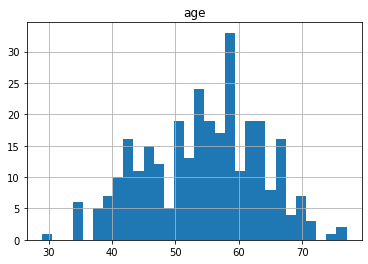

In [10]:
#Histograma da coluna idade
df.hist("age", bins = 30)

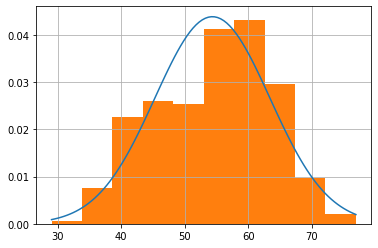

In [11]:
#Fit da distribuição de idade
x_list = np.linspace(df["age"].min() , df["age"].max(), num=100)
y_list = norm.pdf(x_list,  loc = df["age"].mean(), scale=df["age"].std())


plt.plot(x_list, y_list)
df["age"].hist(density = True)

sex - Sexo



*   1 - Masculino
*   0 - Feminino





In [12]:
df.sex.unique()

array([1, 0])

In [13]:
df["sex"].value_counts("target")

1    0.683168
0    0.316832
Name: sex, dtype: float64

In [14]:
#Relacionando as variaveis target e sex
pd.crosstab(df.target, df.sex)


sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

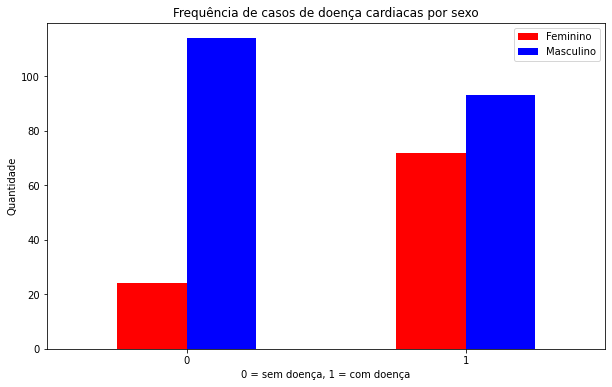

In [15]:
#Grafico de barras para melhor visualizar a relação entra sex e target
pd.crosstab(df.target, df.sex).plot(kind = "bar", color= ("red", "blue"), figsize=(10,6))
plt.title("Frequência de casos de doença cardiacas por sexo")
plt.xlabel("0 = sem doença, 1 = com doença")
plt.ylabel("Quantidade")
plt.legend(["Feminino", "Masculino"])
plt.xticks(rotation=0)


CP - Chest Pain - Dor no Peito


*   0 = Angina Típica: Dor no peito relacionada à diminuição do suprimento no sangue
*   1 = Angína atípica: Dor no peito não relacionada ao coração
*   2 = Dor não Anginosa: Tipicamente espasmos esofágios
*   3 = Assintomático: Dor no peito sem sinais da doença





In [16]:
df["cp"].dtype

dtype('int64')

In [17]:
df["cp"].unique()

array([3, 2, 1, 0])

In [18]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [19]:
#Relacionando as variaveis target e sex
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

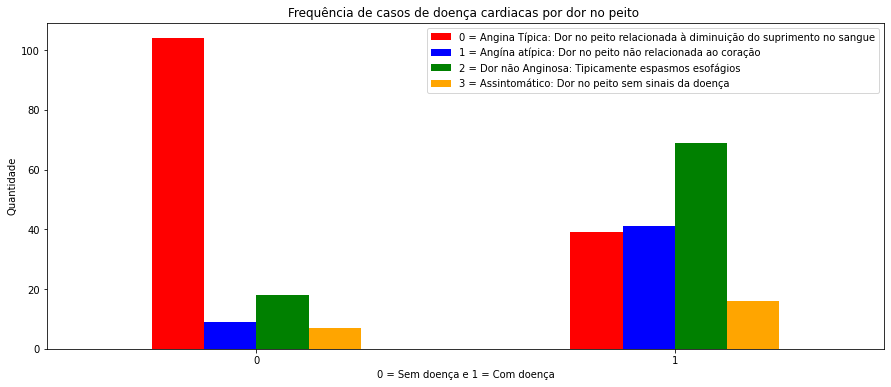

In [20]:
#Grafico de barras para melhor visualizar a relação entra cp e target
pd.crosstab(df.target, df.cp).plot(kind = "bar", color = ("red", "blue", "green", "orange"), figsize = (15,6))
plt.title("Frequência de casos de doença cardiacas por dor no peito ")
plt.xlabel("0 = Sem doença e 1 = Com doença")
plt.ylabel("Quantidade")
plt.legend(["0 = Angina Típica: Dor no peito relacionada à diminuição do suprimento no sangue", "1 = Angína atípica: Dor no peito não relacionada ao coração", "2 = Dor não Anginosa: Tipicamente espasmos esofágios", "3 = Assintomático: Dor no peito sem sinais da doença"], )
plt.xticks(rotation=0)

"Trestbps" - Pressão arterial em repouso


*   Qualquer valor acima de 130-140 é normalmente preocupante



In [21]:
df.trestbps.dtype

dtype('int64')

In [22]:
df.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [23]:
df.trestbps.describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [24]:
#Verificando as pressoes arteriais de risco (acima de 130)
df_risco = df.loc[df.trestbps >= 130]
df_risco.trestbps.unique()

array([145, 130, 140, 172, 150, 135, 160, 142, 155, 138, 134, 152, 132,
       148, 178, 180, 136, 156, 170, 146, 200, 165, 174, 192, 144, 154,
       164])

In [25]:
#Criando nova coluna numérica para pressão arterial (1 - preocupante - não preocupante)
df_sem_risco = df.loc[df.trestbps < 130]
lista = []
for i in df.trestbps:
  if i >=130:
    lista.append(1)
  else:
    lista.append(0)

df["pressao_arterial"] = lista

In [26]:
#Relacionando as variaveis target e pressao_arterial
pd.crosstab(df.target, df["pressao_arterial"])

pressao_arterial,0,1
target,,
0,58,80
1,77,88


"chol" - Colesterol Sérico

*   Acima de 200 é motivo de preocupação




In [ ]:
df.chol.dtype

dtype('int64')

In [ ]:
df["chol"].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131])

In [ ]:
df["chol"].nunique()

152

In [27]:
#Criando nova coluna numérica para colesterol (1 - preocupante - não preocupante)
df_chol_risco = df.loc[df.chol >200]
lista = []
for i in df.chol:
  if i >=200:
    lista.append(1)
  else:
    lista.append(0)

df["colesterol"] = lista

In [28]:
#Relacionando as variaveis target e Colesterol
pd.crosstab(df.target, df.colesterol)

colesterol,0,1
target,,
0,20,118
1,30,135


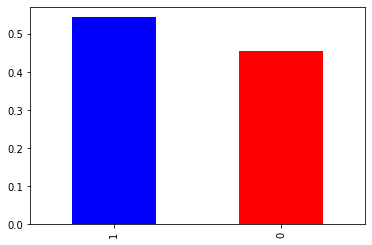

In [29]:
#1 - colesterol acima de 200; 0 - colesterol abaixo de 200
df["target"].value_counts("colesterol").plot(kind="bar", color=("blue","red"))

"fbs" - Açucar no sangue em jejum acima de 120 (1 - Verdadeiro; 0 - False)

*   Acima de 126' mg/dL signals diabetes





In [30]:
df["fbs"].dtype

dtype('int64')

In [31]:
df["fbs"].unique()

array([1, 0])

In [32]:
#1 - Verdadeiro; 0 - False
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [33]:
#Relacionando as variaveis target e fbs
pd.crosstab(df.target, df.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


"restecg" - resultados eletrocardiográficos em repouso


*   0: Nada a notar
*   1: Anormalidade da onda ST-T pode variar de sintomas leves a problemas graves sinaliza batimento cardíaco não normal
*   2: Hipertrofia ventricular esquerda possível ou definitiva


In [34]:
df["restecg"].dtype

dtype('int64')

In [35]:
df["restecg"].unique()

array([0, 1, 2])

In [36]:
df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [37]:
#Relacionando as variaveis target e restecg
pd.crosstab(df.target, df.restecg)

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


"thalach" - frequência cardíaca máxima alcançada


In [38]:
df["thalach"].dtype

dtype('int64')

In [39]:
df["thalach"].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90])

In [40]:
df["thalach"].min()

71

In [41]:
df["thalach"].max()

202

In [42]:
df["thalach"].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

"exang" - angina induzina por exercício (1 - sim; 0 - Não)

In [43]:
df["exang"].dtype

dtype('int64')

In [44]:
df["exang"].unique()

array([0, 1])

In [45]:
df["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [46]:
#Relacionando as variaveis target e exang
pd.crosstab(df.target, df.exang)

exang,0,1
target,,
0,62,76
1,142,23


"oldpeak" - Queda de ST induzida por exercício em relação ao repouso
*   olha para o estresse do coração durante o exercício
*   coração doentio irá estressar mais





In [47]:
df["oldpeak"].dtype

dtype('float64')

In [48]:
df["oldpeak"].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [49]:
df.oldpeak.nunique()

40

"slope" - Inclinação do segmento ST de pico do exercício


*   0: Upsloping: melhor frequência cardíaca com exercício (incomum)
*   1: Flatsloping: mudança mínima (coração saudável típico)
*   2: Downslopins: sinais de coração doentio








In [50]:
df["slope"].dtype

dtype('int64')

In [51]:
df["slope"].unique()

array([0, 2, 1])

In [52]:
df["slope"].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [53]:
#Relacionando as variaveis target e slope
pd.crosstab(df.target, df.slope)

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107


"ca" - número de vasos principais (0-3) coloridos por fluorosopia
*   Vaso colorido significa que o médico pode ver o sangue passando
*   Quanto mais circulação sanguínea, melhor (sem coágulos)





In [54]:
df["ca"].dtype

dtype('int64')

In [55]:
df["ca"].unique()

array([0, 2, 1, 3, 4])

In [56]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [57]:
#Relacionando as variaveis target e ca
pd.crosstab(df.target, df.ca)

ca,0,1,2,3,4
target,,,,,
0,45,44,31,17,1
1,130,21,7,3,4


"thal" - resultado de estresse com tálio


*   1,3: normal
*   6: defeito corrigido: costumava ser defeito, mas agora está bem
*   7: defeito reversível: nenhum movimento sanguíneo adequado durante o exercício





In [58]:
df["thal"].dtype

dtype('int64')

In [59]:
df["thal"].unique()

array([1, 2, 3, 0])

In [60]:
df["thal"].value_counts(ascending=True)

0      2
1     18
3    117
2    166
Name: thal, dtype: int64

In [61]:
#Relacionando as variaveis target e thal
pd.crosstab(df.target, df.thal)

thal,0,1,2,3
target,,,,
0,1,12,36,89
1,1,6,130,28


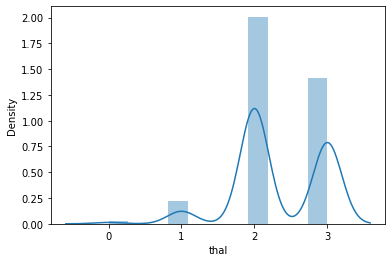

In [73]:
sns.distplot(df.thal)

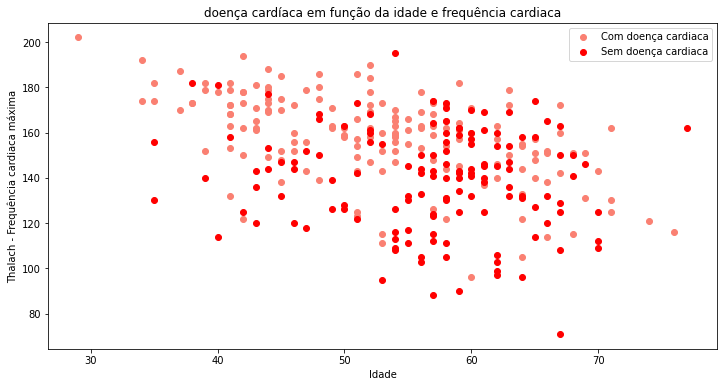

In [74]:
#Grafico de dispersão entre a frequência cardiaca e a idade de quem tem doença e de quem não tem doença cardiaca
plt.figure(figsize=(12,6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = "salmon")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c = "red")

plt.title("doença cardíaca em função da idade e frequência cardiaca")
plt.xlabel("Idade")
plt.ylabel("Thalach - Frequência cardiaca máxima")
plt.legend(["Com doença cardiaca", "Sem doença cardiaca"])

Quanto mais jovem alguém é, mais alta é a frequência cardíaca máxima (pontos mais altos a esquerda do gráfico)

Mas isso pode ocorrer pois há mais pontos do lado direito do gráfico (participantes mais velhos)

In [63]:
cor_matrix = df.corr()

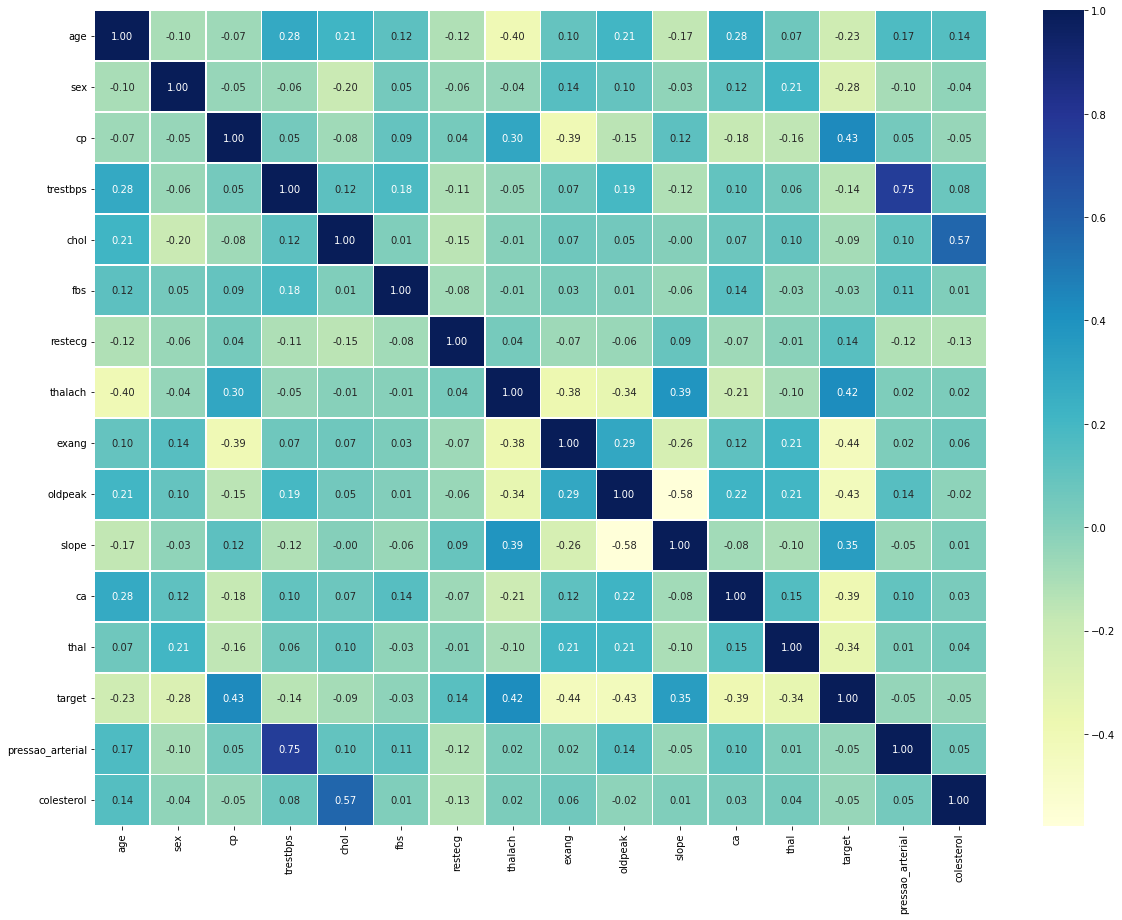

In [64]:
cor_matrix = df.corr()
plt.figure(figsize =  (20,15))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

Muito melhor. Um valor positivo mais alto significa uma correlação positiva potencial (aumento) e um valor negativo mais alto significa uma correlação negativa potencial (diminuição).

Vamos usar modelos de machine learning para conduzir nossas próximas perguntas.

Novo conjunto de dados 

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pressao_arterial,colesterol
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,1


In [66]:
df_novo = df.copy()

In [67]:
df_novo.drop(columns=["trestbps","chol"], inplace = True)

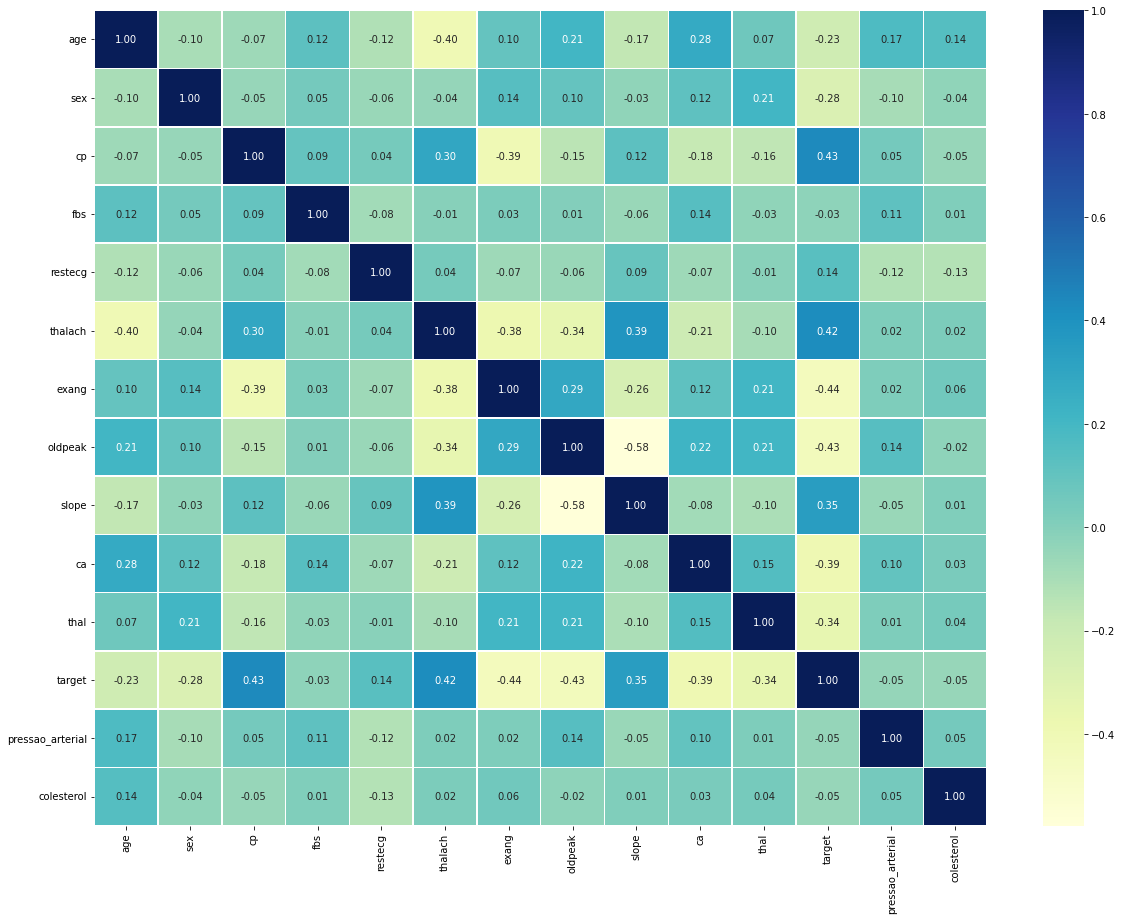

In [68]:
cor_matrix = df_novo.corr()
plt.figure(figsize =  (20,15))
sns.heatmap(cor_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

In [75]:
X = df_novo.drop("target", axis = 1)
y = df_novo.target.values

In [76]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Divisão de treinamento e teste

Agora vem um dos conceitos mais importantes no aprendizado de máquina, a divisão treinamento / teste.

É aqui que você dividirá seus dados em um conjunto de treinamento e um conjunto de teste.

Você usa seu conjunto de treinamento para treinar seu modelo e seu conjunto de teste para testá-lo.

O conjunto de teste deve permanecer separado do conjunto de treinamento.

Por que não usar todos os dados para treinar um modelo?

Digamos que você queira levar seu modelo ao hospital e começar a usá-lo em pacientes. Como você saberia o quão bem o seu modelo vai em um novo paciente não incluído no conjunto de dados completo original que você tinha?

É aqui que entra o conjunto de testes. Ele é usado para simular o máximo possível de levar seu modelo para um ambiente real.

E é por isso que é importante nunca deixar seu modelo aprender com o conjunto de teste, ele só deve ser avaliado nele.

Para dividir nossos dados em um conjunto de treinamento e teste, podemos usar train_test_split () do Scikit-Learn e alimentá-lo com nossas variáveis ​​independentes e dependentes (X e y).

In [77]:
from sklearn.model_selection import train_test_split

O parâmetro test_size é usado para dizer à função train_test_split () quanto de nossos dados queremos no conjunto de teste.

Uma regra prática é usar 80% dos seus dados para treinar e os outros 20% para testar.

Em alguns casos você pode ter treinamento/validação e teste)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set
O parâmetro test_size é usado para dizer à função train_test_split () quanto de nossos dados queremos no conjunto de teste.

Uma regra prática é usar 80% dos seus dados para treinar e os outros 20% para testar.

Em alguns casos você pode ter treinamento/validação e teste)**negrito**

In [79]:
X_train.shape

(242, 13)

In [80]:
X_test.shape

(61, 13)

In [81]:
y_train.shape

(242,)

In [82]:
y_test.shape

(61,)

Opções de modelo

Agora que preparamos nossos dados, podemos começar a ajustar os modelos. Estaremos usando o seguinte e comparando seus resultados.

Regressão Logística - LogisticRegression ()
K-vizinhos mais próximos - KNeighboursClassifier ()
RandomForest - RandomForestClassifier ()
Se olharmos a folha de dicas do algoritmo Scikit-Learn, podemos ver que estamos trabalhando em um problema de classificação e esses são os algoritmos que ele sugere (e mais alguns).

Por enquanto, conhecer cada um desses algoritmos por dentro e por fora não é essencial.

O aprendizado de máquina e a ciência de dados são uma prática iterativa. Esses algoritmos são ferramentas em sua caixa de ferramentas.

No início, no caminho para se tornar um praticante, é mais importante entender o seu problema (como classificação versus regressão) e então saber quais ferramentas você pode usar para resolvê-lo.

Todos os algoritmos da biblioteca Scikit-Learn usam as mesmas funções, para treinar um modelo, model.fit (X_train, y_train) e para pontuar um modelo model.score (X_test, y_test). score () retorna a proporção de predições corretas (1,0 = 100% correto).

Como os algoritmos que escolhemos implementam os mesmos métodos para ajustá-los aos dados e também para avaliá-los, vamos colocá-los em um dicionário e criar um que os ajuste e pontue.

In [83]:
#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

import warnings
warnings.filterwarnings("ignore")

In [84]:
models = {
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier()
}

In [85]:
models

{'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'RandomForest': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
   

In [86]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [87]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train= y_train, y_test= y_test)

model_scores

{'KNN': 0.7049180327868853,
 'LogisticRegression': 0.8852459016393442,
 'RandomForest': 0.7704918032786885}

Comparação de Modelos

Como salvamos as pontuações de nossos modelos em um dicionário, podemos representá-los primeiro convertendo-os em um DataFrame.

In [88]:
com_model = pd.DataFrame(model_scores, index=["accuracy"])
com_model

,KNN,LogisticRegression,RandomForest
accuracy,0.704918,0.885246,0.770492


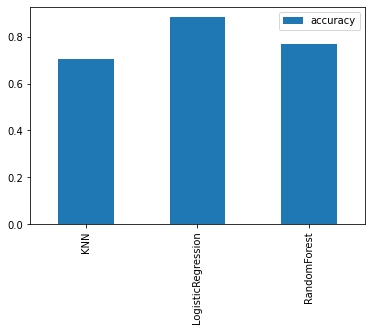

In [89]:
model_comparacao = pd.DataFrame(model_scores, index=['accuracy'])
model_comparacao.T.plot.bar();

In [91]:
#Usando o logisticRegrassion
lr_model = LogisticRegression()

In [92]:
#
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)